In [1]:
using StatsBase
using DataStructures
using Plots

include("cutoff.jl")

lazy_ehrenfest (generic function with 1 method)

In [2]:
# parameters
num_balls = 512
balls = [0, num_balls]
urn = 1
lazy = true

num_balls_distribution (generic function with 1 method)

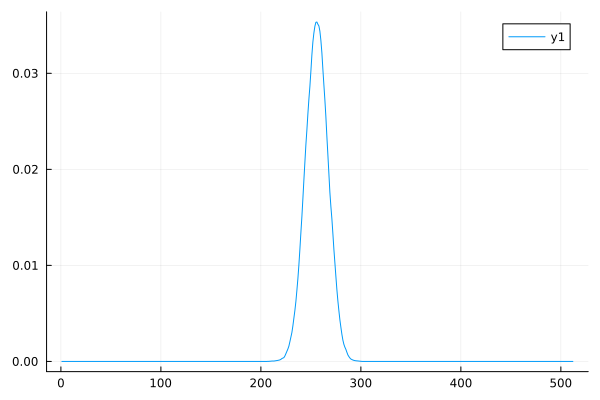

In [36]:
"""
We first observe what the stationary distribution looks like.
"""
# to get the stationary dist of ehrenfest, take a 1000 steps, discard them, and then start 
# keeping tabs on the number of balls in urn 1
run_chain(balls, 1000000, lazy, urn)
urn_counts = run_chain(balls, 1000000, lazy, urn)
stationary = num_balls_distribution(num_balls, urn_counts)

plot(stationary)

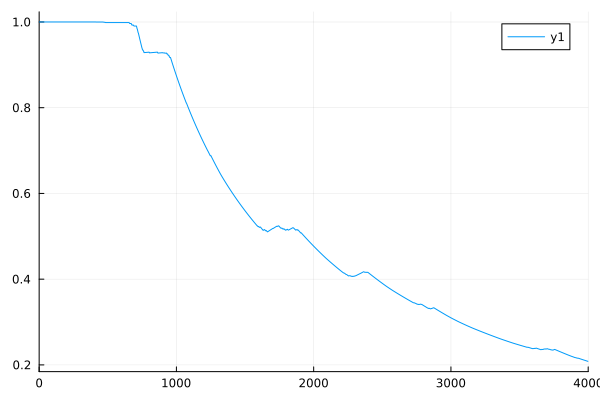

In [39]:
num_steps = 4000

balls = [0, num_balls]
urn_counts = run_chain(balls, num_steps, lazy, urn)

tvds = []

for step = 1:num_steps
    chain = first(urn_counts, step)
    dist = num_balls_distribution(num_balls, chain)
    
    push!(tvds, tvd(stationary, dist))
end

plot(tvds, xlims=(0, num_steps))

The above plot shows the total variation distance between the stationary distribution and the distribution produced by the Markov Chain. Aldous showed that there exists a cutoff (you can see it for yourself.) The first 500 or so steps the total variation distance is at 1, after which it starts dipping quickly. 

Importantly, this is the distribution for urn 1 when the urn starts with 0 balls.

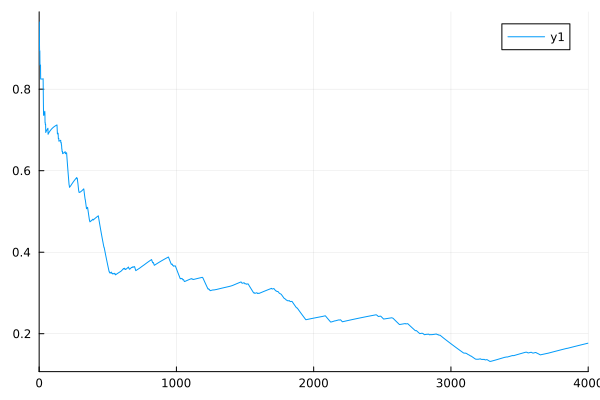

In [42]:
num_steps = 4000

balls = [256, 256]
urn_counts = run_chain(balls, num_steps, lazy, urn)

tvds = []

for step = 1:num_steps
    chain = first(urn_counts, step)
    dist = num_balls_distribution(num_balls, chain)
    
    push!(tvds, tvd(stationary, dist))
end

plot(tvds, xlims=(0, num_steps))

Suprisingly, there is no cutoff if urn 1 starts at n/2 balls. This was shown by Diaconis. 